# Andrew Pitts
### HW6

### PART I

**(A)**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#note, this function expects a matrix A[ix,iy] 
#and then displays so that A[:,0] is the lowest row of pixels
def display(A):
    maxX = A.shape[0]
    maxY = A.shape[1]
    B = np.zeros((maxY, maxX))
    for ix in range(0,maxX):
        for iy in range(0,maxY):
            B[maxY-1-iy,ix] = A[ix,iy]

    #Display the graphics outside of the notebook. 
    #On a PC, use '%matplotlib qt' instead.
    #%matplotlib qt 
    
    plt.rcParams['figure.figsize'] = [6, 6/maxX*maxY]
    plt.imshow(B); 
    plt.axis('off'); 
    plt.show()
    plt.draw()
    plt.pause(1)

**probability p=0.01**

i= 0 	x=355 	y=1 	yStart=6


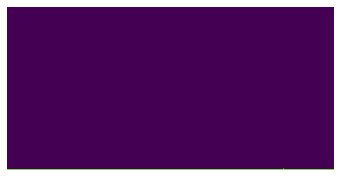

<Figure size 432x216 with 0 Axes>

i= 1000 	x=11 	y=3 	yStart=14


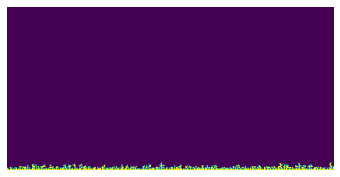

<Figure size 432x216 with 0 Axes>

i= 2000 	x=320 	y=7 	yStart=20


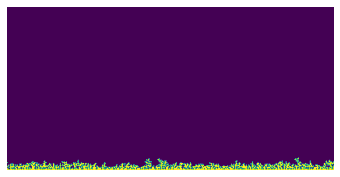

<Figure size 432x216 with 0 Axes>

i= 3000 	x=46 	y=14 	yStart=25


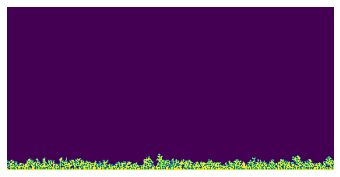

<Figure size 432x216 with 0 Axes>

i= 4000 	x=184 	y=21 	yStart=30


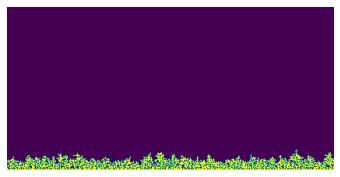

<Figure size 432x216 with 0 Axes>

i= 5000 	x=295 	y=20 	yStart=34


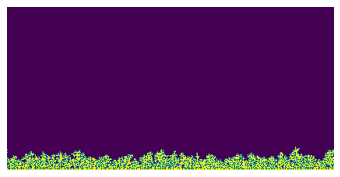

<Figure size 432x216 with 0 Axes>

i= 6000 	x=335 	y=17 	yStart=35


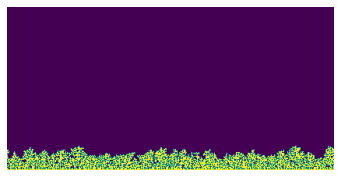

<Figure size 432x216 with 0 Axes>

i= 7000 	x=236 	y=19 	yStart=40


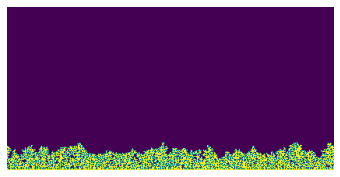

<Figure size 432x216 with 0 Axes>

i= 8000 	x=113 	y=23 	yStart=44


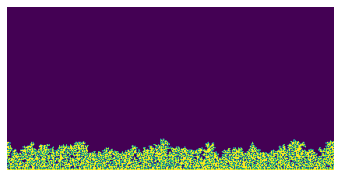

<Figure size 432x216 with 0 Axes>

i= 9000 	x=138 	y=26 	yStart=51


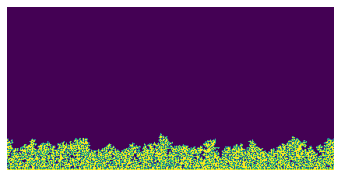

<Figure size 432x216 with 0 Axes>

i= 10000 	x=322 	y=33 	yStart=54


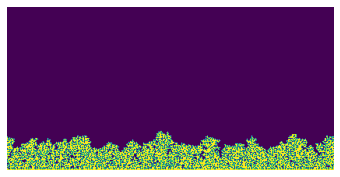

<Figure size 432x216 with 0 Axes>

i= 11000 	x=49 	y=38 	yStart=58


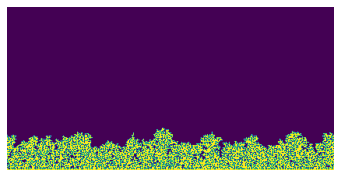

<Figure size 432x216 with 0 Axes>

i= 12000 	x=54 	y=46 	yStart=64


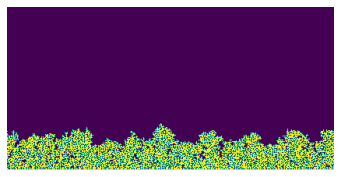

<Figure size 432x216 with 0 Axes>

i= 13000 	x=323 	y=47 	yStart=66


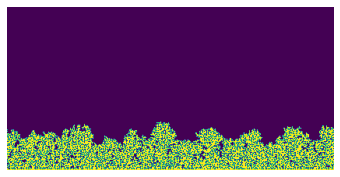

<Figure size 432x216 with 0 Axes>

i= 14000 	x=304 	y=49 	yStart=71


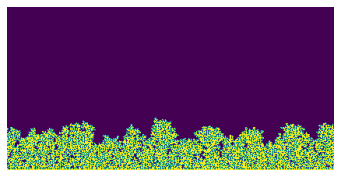

<Figure size 432x216 with 0 Axes>

i= 15000 	x=221 	y=41 	yStart=74


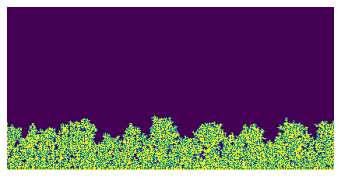

<Figure size 432x216 with 0 Axes>

i= 16000 	x=393 	y=58 	yStart=79


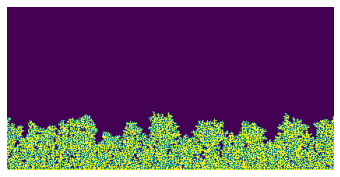

<Figure size 432x216 with 0 Axes>

i= 17000 	x=35 	y=63 	yStart=83


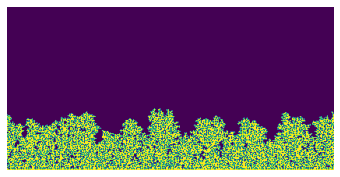

<Figure size 432x216 with 0 Axes>

i= 18000 	x=211 	y=76 	yStart=87


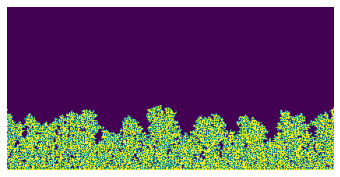

<Figure size 432x216 with 0 Axes>

i= 19000 	x=299 	y=70 	yStart=91


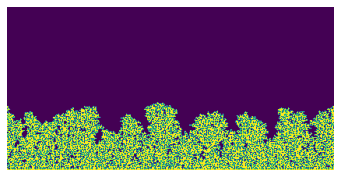

<Figure size 432x216 with 0 Axes>

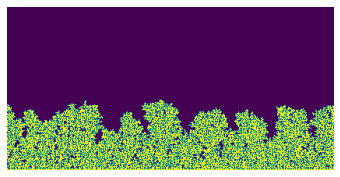

<Figure size 432x216 with 0 Axes>

p is 1.0 %


In [3]:
yBuffer = 5
yStart  = 1 + yBuffer
nParticles = 20000
maxX = 420
maxY = 210
A = np.zeros((maxX, maxY))
A[:,0] = 1
p=0.01

for i in range(0,nParticles):
    # Compute new starting point on the line y=yStart
    x  = np.random.randint(0,maxX)
    y  = yStart; #always start at upper limit
    n=0
    P=p

    while True:
        xOrg = x
        yOrg = y

        r = np.random.random(); # Random float:  0.0 <= r < 1.0
        #based on the value of 'r', move the particle
        #left, right, up, or down and change x and y accordingly
        if r<0.25:
            x = x+1 #right
        elif r>=0.25 and r<0.5:
            x = x-1 #left
        elif r>=0.5 and r<0.75:
            y = y+1 #up
        elif r>=0.75:
            y = y-1 #down
        
        #now apply periodic boundary conditions to 'x'
        if x<0:
            x = x + maxX
        if x>=maxX:
            x = x - maxX
        
        if (A[x,y] == 1 or y>yStart): 
            x = xOrg
            y = yOrg
            continue; # if this site has been taken try moving in a different direction
        
        #determine the x coordionates of the left and right neighbors
        #store them in 'xm' and 'xp' and apply periodic boundary conditions again
        xp = x + 1
        xm = x - 1
        yp = y + 1
        ym = y - 1
        
        if xp>=maxX:
            xp = xp - maxX
        if xm<0:
            xm = xm + maxX
        
        # Determine if any neighboring site is occupied
        # if that is the case, enter the following 'if' clause
        if A[xp,y]==1 or A[xm,y]==1 or A[x,ym]==1 or A[x,yp]==1:
            n=n+1
        if n==2:
            P=p*10
        if n==3:
            P=p*20
        if n==4:
            P=p*30
        n=0
        
        if np.random.random()<P:
            if A[xp,y]==1 or A[xm,y]==1 or A[x,ym]==1 or A[x,yp]==1: 
                A[x,y] = 1
                if (y+yBuffer>yStart and y+yBuffer<maxY): 
                    yStart = y+yBuffer

                if (i%1000==0): 
                    print(f'i= {i} \tx={x} \ty={y} \tyStart={yStart}')

                nNewParticlesPerFrame = 1000 
                if (i%nNewParticlesPerFrame==0): 
                    display(A)

                break # particle was attached, break out of current loop and insert next one

    if (yStart+1==maxY): 
        print(f'Structures reached Y limit after only {i} particles')
        break

display(A)
print('p is',p*100,'%')

**probability p=0.1**

i= 0 	x=266 	y=1 	yStart=6


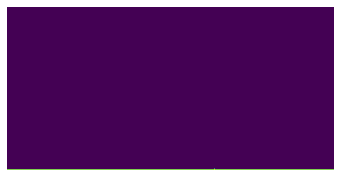

<Figure size 432x216 with 0 Axes>

i= 1000 	x=405 	y=6 	yStart=15


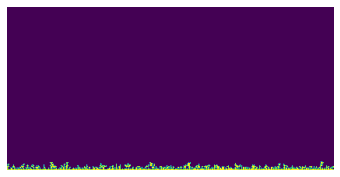

<Figure size 432x216 with 0 Axes>

i= 2000 	x=277 	y=10 	yStart=23


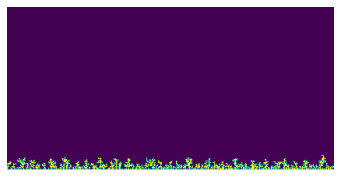

<Figure size 432x216 with 0 Axes>

i= 3000 	x=290 	y=22 	yStart=33


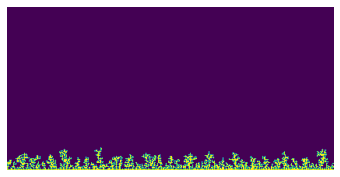

<Figure size 432x216 with 0 Axes>

i= 4000 	x=410 	y=14 	yStart=42


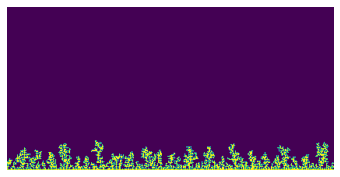

<Figure size 432x216 with 0 Axes>

i= 5000 	x=260 	y=35 	yStart=50


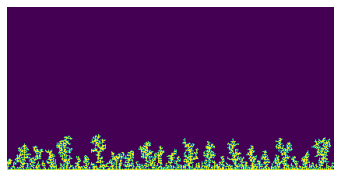

<Figure size 432x216 with 0 Axes>

i= 6000 	x=267 	y=35 	yStart=59


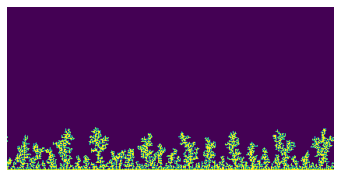

<Figure size 432x216 with 0 Axes>

i= 7000 	x=81 	y=58 	yStart=67


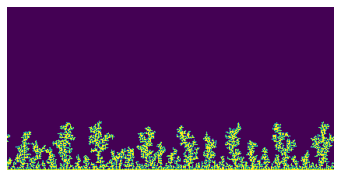

<Figure size 432x216 with 0 Axes>

i= 8000 	x=216 	y=49 	yStart=82


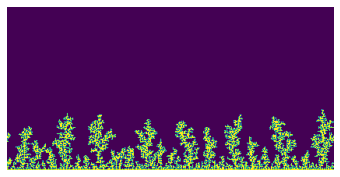

<Figure size 432x216 with 0 Axes>

i= 9000 	x=135 	y=55 	yStart=89


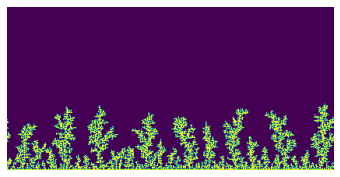

<Figure size 432x216 with 0 Axes>

i= 10000 	x=122 	y=92 	yStart=99


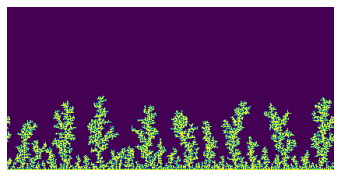

<Figure size 432x216 with 0 Axes>

i= 11000 	x=131 	y=90 	yStart=108


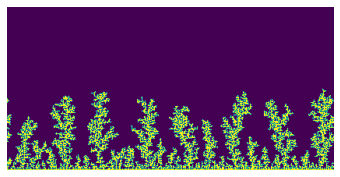

<Figure size 432x216 with 0 Axes>

i= 12000 	x=226 	y=83 	yStart=118


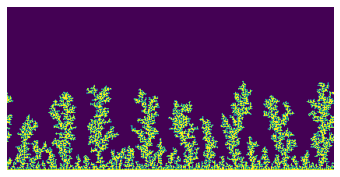

<Figure size 432x216 with 0 Axes>

i= 13000 	x=304 	y=122 	yStart=128


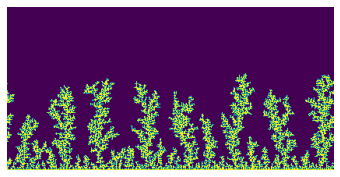

<Figure size 432x216 with 0 Axes>

i= 14000 	x=169 	y=121 	yStart=136


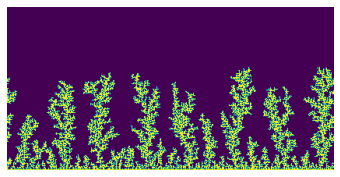

<Figure size 432x216 with 0 Axes>

i= 15000 	x=316 	y=135 	yStart=145


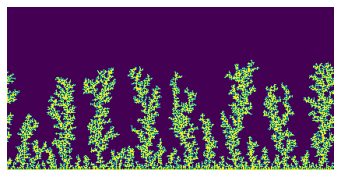

<Figure size 432x216 with 0 Axes>

i= 16000 	x=418 	y=142 	yStart=154


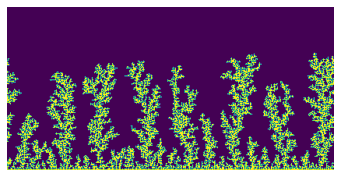

<Figure size 432x216 with 0 Axes>

i= 17000 	x=225 	y=140 	yStart=167


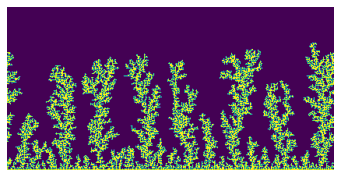

<Figure size 432x216 with 0 Axes>

i= 18000 	x=8 	y=156 	yStart=181


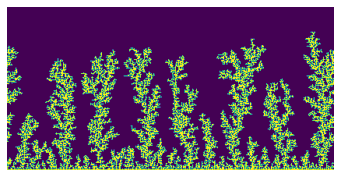

<Figure size 432x216 with 0 Axes>

i= 19000 	x=317 	y=175 	yStart=192


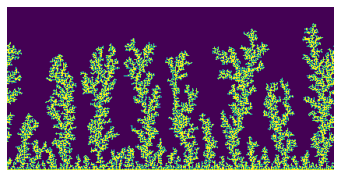

<Figure size 432x216 with 0 Axes>

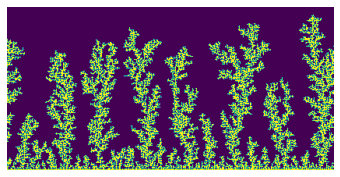

<Figure size 432x216 with 0 Axes>

p is 10.0 %


In [4]:
yBuffer = 5
yStart  = 1 + yBuffer
nParticles = 20000
maxX = 420
maxY = 210
A = np.zeros((maxX, maxY))
A[:,0] = 1
p=0.1

for i in range(0,nParticles):
    # Compute new starting point on the line y=yStart
    x  = np.random.randint(0,maxX)
    y  = yStart; #always start at upper limit
    n=0
    P=p

    while True:
        xOrg = x
        yOrg = y

        r = np.random.random(); # Random float:  0.0 <= r < 1.0
        #based on the value of 'r', move the particle
        #left, right, up, or down and change x and y accordingly
        if r<0.25:
            x = x+1 #right
        elif r>=0.25 and r<0.5:
            x = x-1 #left
        elif r>=0.5 and r<0.75:
            y = y+1 #up
        elif r>=0.75:
            y = y-1 #down
        
        #now apply periodic boundary conditions to 'x'
        if x<0:
            x = x + maxX
        if x>=maxX:
            x = x - maxX
        
        if (A[x,y] == 1 or y>yStart): 
            x = xOrg
            y = yOrg
            continue; # if this site has been taken try moving in a different direction
        
        #determine the x coordionates of the left and right neighbors
        #store them in 'xm' and 'xp' and apply periodic boundary conditions again
        xp = x + 1
        xm = x - 1
        yp = y + 1
        ym = y - 1
        
        if xp>=maxX:
            xp = xp - maxX
        if xm<0:
            xm = xm + maxX
        
        # Determine if any neighboring site is occupied
        # if that is the case, enter the following 'if' clause
        if A[xp,y]==1 or A[xm,y]==1 or A[x,ym]==1 or A[x,yp]==1:
            n=n+1
        if n==2:
            P=p*10
        if n==3:
            P=p*20
        if n==4:
            P=p*30
        n=0
        
        if np.random.random()<P:
            if A[xp,y]==1 or A[xm,y]==1 or A[x,ym]==1 or A[x,yp]==1: 
                A[x,y] = 1
                if (y+yBuffer>yStart and y+yBuffer<maxY): 
                    yStart = y+yBuffer

                if (i%1000==0): 
                    print(f'i= {i} \tx={x} \ty={y} \tyStart={yStart}')

                nNewParticlesPerFrame = 1000 
                if (i%nNewParticlesPerFrame==0): 
                    display(A)

                break # particle was attached, break out of current loop and insert next one

    if (yStart+1==maxY): 
        print(f'Structures reached Y limit after only {i} particles')
        break

display(A)
print('p is',p*100,'%')

**probability p=0.5**

i= 0 	x=390 	y=1 	yStart=6


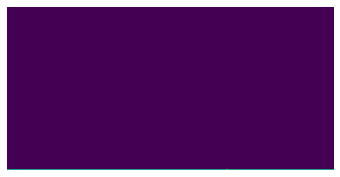

<Figure size 432x216 with 0 Axes>

i= 1000 	x=245 	y=5 	yStart=18


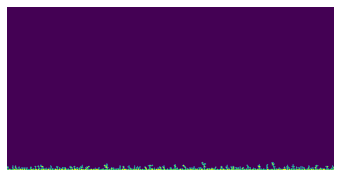

<Figure size 432x216 with 0 Axes>

i= 2000 	x=396 	y=13 	yStart=28


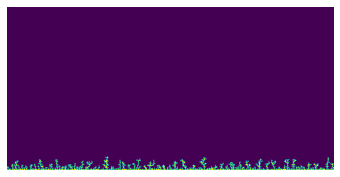

<Figure size 432x216 with 0 Axes>

i= 3000 	x=237 	y=28 	yStart=39


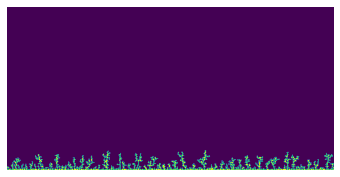

<Figure size 432x216 with 0 Axes>

i= 4000 	x=354 	y=52 	yStart=57


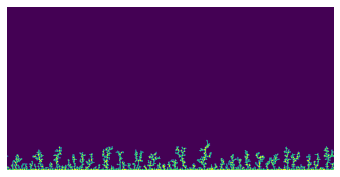

<Figure size 432x216 with 0 Axes>

i= 5000 	x=361 	y=63 	yStart=68


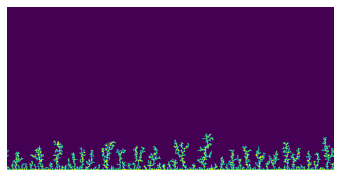

<Figure size 432x216 with 0 Axes>

i= 6000 	x=187 	y=64 	yStart=86


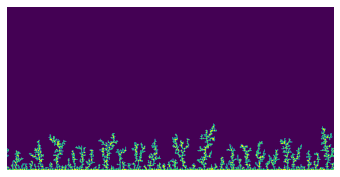

<Figure size 432x216 with 0 Axes>

i= 7000 	x=565 	y=84 	yStart=101


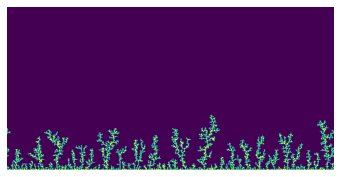

<Figure size 432x216 with 0 Axes>

i= 8000 	x=447 	y=73 	yStart=109


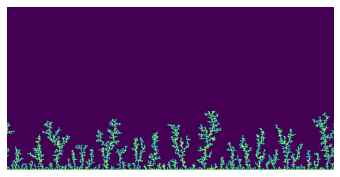

<Figure size 432x216 with 0 Axes>

i= 9000 	x=343 	y=101 	yStart=118


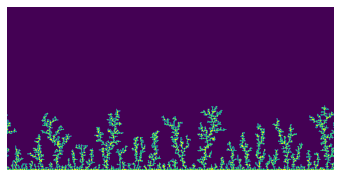

<Figure size 432x216 with 0 Axes>

i= 10000 	x=268 	y=106 	yStart=128


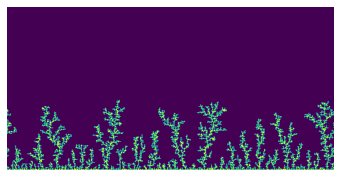

<Figure size 432x216 with 0 Axes>

i= 11000 	x=536 	y=88 	yStart=141


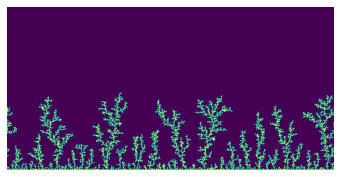

<Figure size 432x216 with 0 Axes>

i= 12000 	x=69 	y=131 	yStart=150


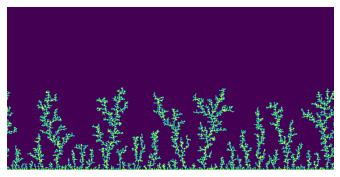

<Figure size 432x216 with 0 Axes>

i= 13000 	x=205 	y=154 	yStart=159


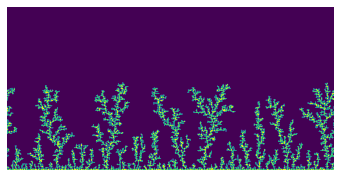

<Figure size 432x216 with 0 Axes>

i= 14000 	x=316 	y=147 	yStart=167


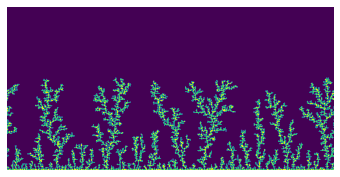

<Figure size 432x216 with 0 Axes>

i= 15000 	x=329 	y=165 	yStart=175


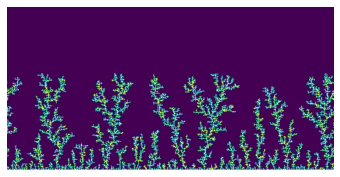

<Figure size 432x216 with 0 Axes>

i= 16000 	x=363 	y=162 	yStart=188


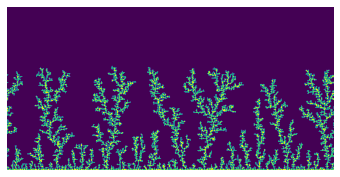

<Figure size 432x216 with 0 Axes>

i= 17000 	x=180 	y=185 	yStart=201


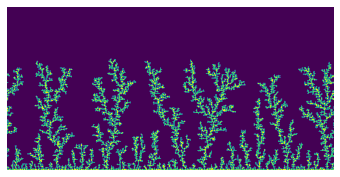

<Figure size 432x216 with 0 Axes>

i= 18000 	x=237 	y=196 	yStart=214


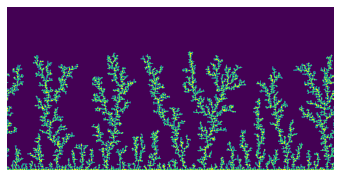

<Figure size 432x216 with 0 Axes>

i= 19000 	x=245 	y=218 	yStart=224


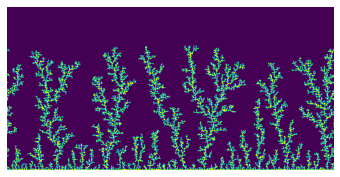

<Figure size 432x216 with 0 Axes>

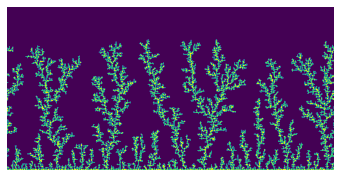

<Figure size 432x216 with 0 Axes>

p is 50.0 %


In [13]:
yBuffer = 5
yStart  = 1 + yBuffer
nParticles = 20000
maxX = 580
maxY = 290
A = np.zeros((maxX, maxY))
A[:,0] = 1
p=0.5

for i in range(0,nParticles):
    # Compute new starting point on the line y=yStart
    x  = np.random.randint(0,maxX)
    y  = yStart; #always start at upper limit
    n=0
    P=p

    while True:
        xOrg = x
        yOrg = y

        r = np.random.random(); # Random float:  0.0 <= r < 1.0
        #based on the value of 'r', move the particle
        #left, right, up, or down and change x and y accordingly
        if r<0.25:
            x = x+1 #right
        elif r>=0.25 and r<0.5:
            x = x-1 #left
        elif r>=0.5 and r<0.75:
            y = y+1 #up
        elif r>=0.75:
            y = y-1 #down
        
        #now apply periodic boundary conditions to 'x'
        if x<0:
            x = x + maxX
        if x>=maxX:
            x = x - maxX
        
        if (A[x,y] == 1 or y>yStart): 
            x = xOrg
            y = yOrg
            continue; # if this site has been taken try moving in a different direction
        
        #determine the x coordionates of the left and right neighbors
        #store them in 'xm' and 'xp' and apply periodic boundary conditions again
        xp = x + 1
        xm = x - 1
        yp = y + 1
        ym = y - 1
        
        if xp>=maxX:
            xp = xp - maxX
        if xm<0:
            xm = xm + maxX
        
        # Determine if any neighboring site is occupied
        # if that is the case, enter the following 'if' clause
        if A[xp,y]==1 or A[xm,y]==1 or A[x,ym]==1 or A[x,yp]==1:
            n=n+1
        if n==2:
            P=p*10
        if n==3:
            P=p*20
        if n==4:
            P=p*30
        n=0
        
        if np.random.random()<P:
            if A[xp,y]==1 or A[xm,y]==1 or A[x,ym]==1 or A[x,yp]==1: 
                A[x,y] = 1
                if (y+yBuffer>yStart and y+yBuffer<maxY): 
                    yStart = y+yBuffer

                if (i%1000==0): 
                    print(f'i= {i} \tx={x} \ty={y} \tyStart={yStart}')

                nNewParticlesPerFrame = 1000 
                if (i%nNewParticlesPerFrame==0): 
                    display(A)

                break # particle was attached, break out of current loop and insert next one

    if (yStart+1==maxY): 
        print(f'Structures reached Y limit after only {i} particles')
        break

display(A)
print('p is',p*100,'%')

**probability p=0.005**

i= 0 	x=329 	y=1 	yStart=6


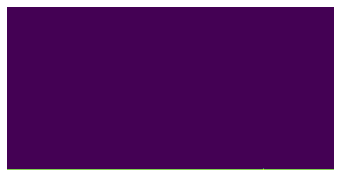

<Figure size 432x216 with 0 Axes>

i= 1000 	x=284 	y=3 	yStart=14


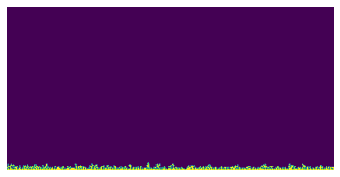

<Figure size 432x216 with 0 Axes>

i= 2000 	x=367 	y=8 	yStart=19


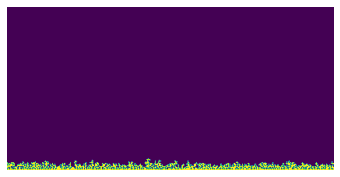

<Figure size 432x216 with 0 Axes>

i= 3000 	x=2 	y=12 	yStart=22


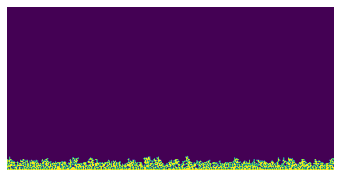

<Figure size 432x216 with 0 Axes>

i= 4000 	x=211 	y=15 	yStart=26


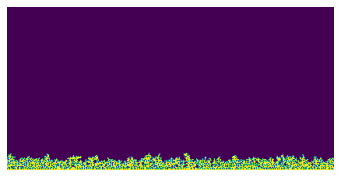

<Figure size 432x216 with 0 Axes>

i= 5000 	x=12 	y=19 	yStart=30


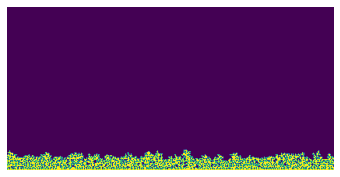

<Figure size 432x216 with 0 Axes>

i= 6000 	x=220 	y=20 	yStart=33


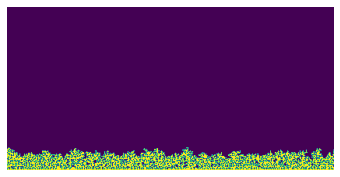

<Figure size 432x216 with 0 Axes>

i= 7000 	x=187 	y=27 	yStart=38


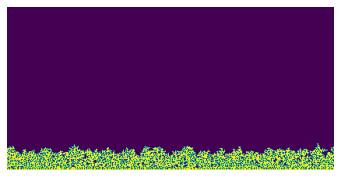

<Figure size 432x216 with 0 Axes>

i= 8000 	x=186 	y=27 	yStart=41


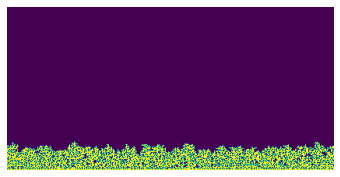

<Figure size 432x216 with 0 Axes>

i= 9000 	x=91 	y=36 	yStart=44


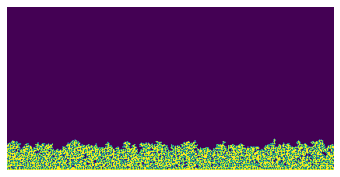

<Figure size 432x216 with 0 Axes>

i= 10000 	x=117 	y=33 	yStart=48


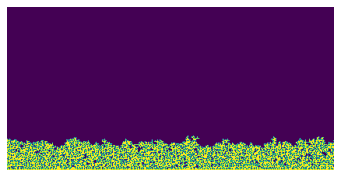

<Figure size 432x216 with 0 Axes>

i= 11000 	x=342 	y=46 	yStart=52


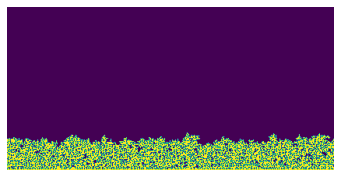

<Figure size 432x216 with 0 Axes>

i= 12000 	x=383 	y=44 	yStart=55


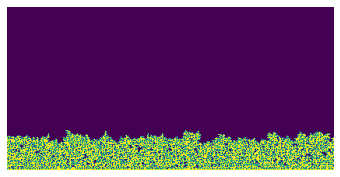

<Figure size 432x216 with 0 Axes>

i= 13000 	x=254 	y=35 	yStart=60


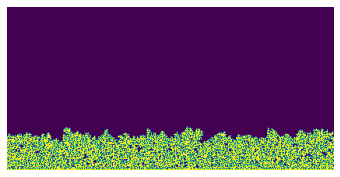

<Figure size 432x216 with 0 Axes>

i= 14000 	x=344 	y=54 	yStart=64


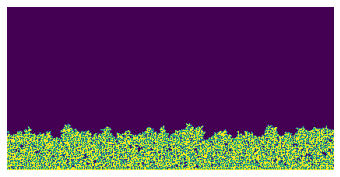

<Figure size 432x216 with 0 Axes>

i= 15000 	x=169 	y=50 	yStart=68


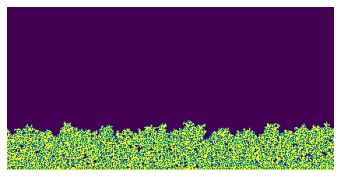

<Figure size 432x216 with 0 Axes>

i= 16000 	x=274 	y=56 	yStart=70


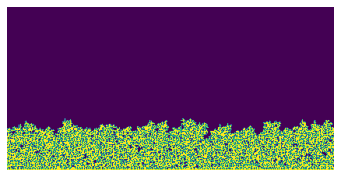

<Figure size 432x216 with 0 Axes>

i= 17000 	x=416 	y=64 	yStart=73


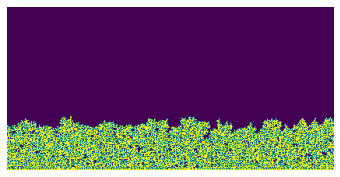

<Figure size 432x216 with 0 Axes>

i= 18000 	x=398 	y=64 	yStart=78


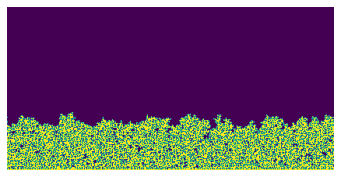

<Figure size 432x216 with 0 Axes>

i= 19000 	x=15 	y=70 	yStart=81


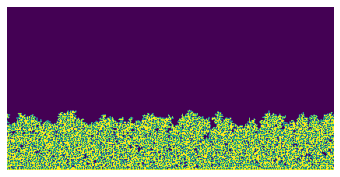

<Figure size 432x216 with 0 Axes>

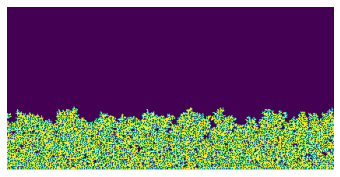

<Figure size 432x216 with 0 Axes>

p is 0.5 %


In [6]:
yBuffer = 5
yStart  = 1 + yBuffer
nParticles = 20000
maxX = 420
maxY = 210
A = np.zeros((maxX, maxY))
A[:,0] = 1
p=0.005

for i in range(0,nParticles):
    # Compute new starting point on the line y=yStart
    x  = np.random.randint(0,maxX)
    y  = yStart; #always start at upper limit
    n=0
    P=p

    while True:
        xOrg = x
        yOrg = y

        r = np.random.random(); # Random float:  0.0 <= r < 1.0
        #based on the value of 'r', move the particle
        #left, right, up, or down and change x and y accordingly
        if r<0.25:
            x = x+1 #right
        elif r>=0.25 and r<0.5:
            x = x-1 #left
        elif r>=0.5 and r<0.75:
            y = y+1 #up
        elif r>=0.75:
            y = y-1 #down
        
        #now apply periodic boundary conditions to 'x'
        if x<0:
            x = x + maxX
        if x>=maxX:
            x = x - maxX
        
        if (A[x,y] == 1 or y>yStart): 
            x = xOrg
            y = yOrg
            continue; # if this site has been taken try moving in a different direction
        
        #determine the x coordionates of the left and right neighbors
        #store them in 'xm' and 'xp' and apply periodic boundary conditions again
        xp = x + 1
        xm = x - 1
        yp = y + 1
        ym = y - 1
        
        if xp>=maxX:
            xp = xp - maxX
        if xm<0:
            xm = xm + maxX
        
        # Determine if any neighboring site is occupied
        # if that is the case, enter the following 'if' clause
        if A[xp,y]==1 or A[xm,y]==1 or A[x,ym]==1 or A[x,yp]==1:
            n=n+1
        if n==2:
            P=p*10
        if n==3:
            P=p*20
        if n==4:
            P=p*30
        n=0
        
        if np.random.random()<P:
            if A[xp,y]==1 or A[xm,y]==1 or A[x,ym]==1 or A[x,yp]==1: 
                A[x,y] = 1
                if (y+yBuffer>yStart and y+yBuffer<maxY): 
                    yStart = y+yBuffer

                if (i%1000==0): 
                    print(f'i= {i} \tx={x} \ty={y} \tyStart={yStart}')

                nNewParticlesPerFrame = 1000 
                if (i%nNewParticlesPerFrame==0): 
                    display(A)

                break # particle was attached, break out of current loop and insert next one

    if (yStart+1==maxY): 
        print(f'Structures reached Y limit after only {i} particles')
        break

display(A)
print('p is',p*100,'%')

**probability p=0.001**

i= 0 	x=21 	y=1 	yStart=6


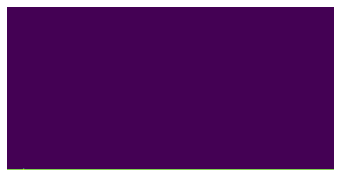

<Figure size 432x216 with 0 Axes>

i= 1000 	x=394 	y=3 	yStart=12


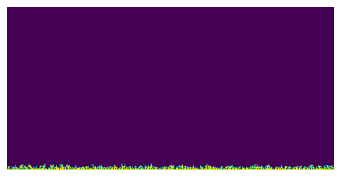

<Figure size 432x216 with 0 Axes>

i= 2000 	x=179 	y=6 	yStart=17


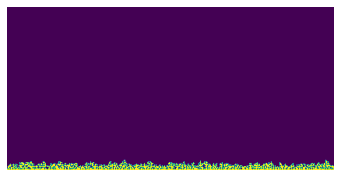

<Figure size 432x216 with 0 Axes>

i= 3000 	x=414 	y=13 	yStart=22


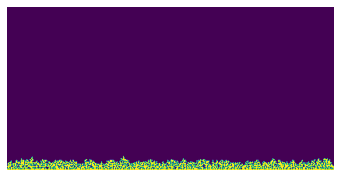

<Figure size 432x216 with 0 Axes>

i= 4000 	x=133 	y=16 	yStart=25


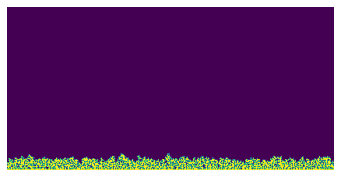

<Figure size 432x216 with 0 Axes>

i= 5000 	x=72 	y=20 	yStart=30


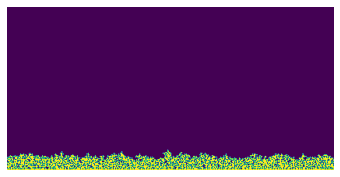

<Figure size 432x216 with 0 Axes>

i= 6000 	x=220 	y=25 	yStart=33


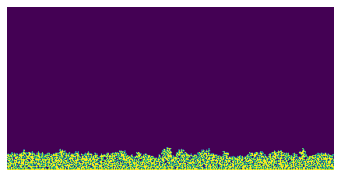

<Figure size 432x216 with 0 Axes>

i= 7000 	x=102 	y=26 	yStart=35


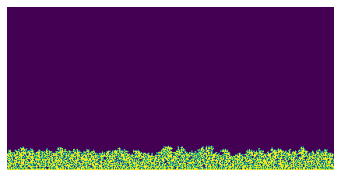

<Figure size 432x216 with 0 Axes>

i= 8000 	x=419 	y=21 	yStart=39


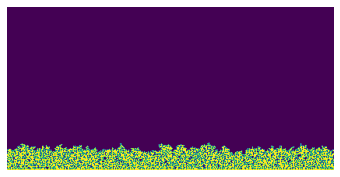

<Figure size 432x216 with 0 Axes>

i= 9000 	x=198 	y=34 	yStart=43


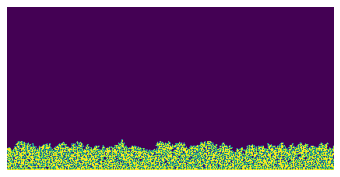

<Figure size 432x216 with 0 Axes>

i= 10000 	x=244 	y=36 	yStart=46


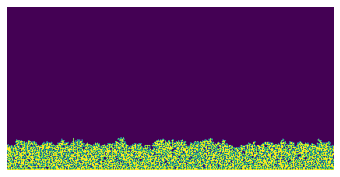

<Figure size 432x216 with 0 Axes>

i= 11000 	x=195 	y=42 	yStart=50


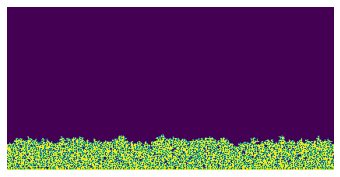

<Figure size 432x216 with 0 Axes>

i= 12000 	x=15 	y=42 	yStart=54


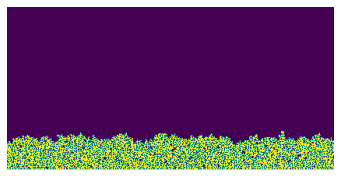

<Figure size 432x216 with 0 Axes>

i= 13000 	x=340 	y=43 	yStart=58


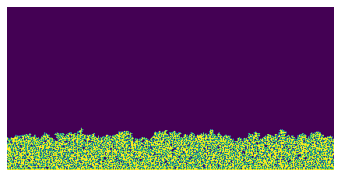

<Figure size 432x216 with 0 Axes>

i= 14000 	x=33 	y=46 	yStart=62


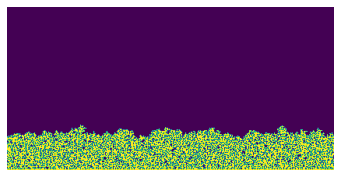

<Figure size 432x216 with 0 Axes>

i= 15000 	x=23 	y=47 	yStart=66


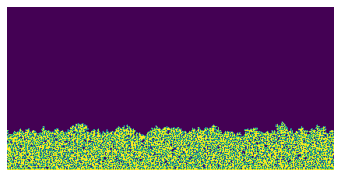

<Figure size 432x216 with 0 Axes>

i= 16000 	x=343 	y=55 	yStart=68


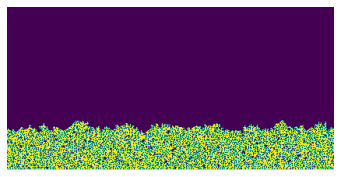

<Figure size 432x216 with 0 Axes>

i= 17000 	x=267 	y=62 	yStart=70


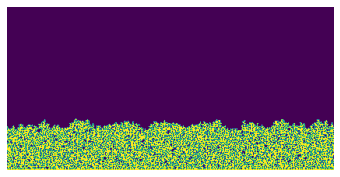

<Figure size 432x216 with 0 Axes>

i= 18000 	x=414 	y=60 	yStart=74


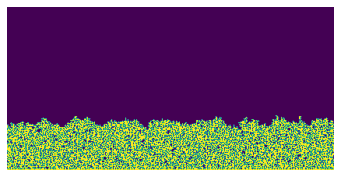

<Figure size 432x216 with 0 Axes>

i= 19000 	x=284 	y=62 	yStart=80


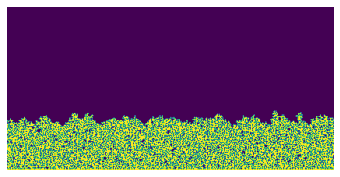

<Figure size 432x216 with 0 Axes>

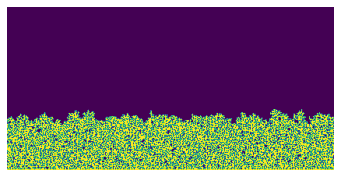

<Figure size 432x216 with 0 Axes>

p is 0.2 %


In [7]:
yBuffer = 5
yStart  = 1 + yBuffer
nParticles = 20000
maxX = 420
maxY = 210
A = np.zeros((maxX, maxY))
A[:,0] = 1
p=0.002

for i in range(0,nParticles):
    # Compute new starting point on the line y=yStart
    x  = np.random.randint(0,maxX)
    y  = yStart; #always start at upper limit
    n=0
    P=p

    while True:
        xOrg = x
        yOrg = y

        r = np.random.random(); # Random float:  0.0 <= r < 1.0
        #based on the value of 'r', move the particle
        #left, right, up, or down and change x and y accordingly
        if r<0.25:
            x = x+1 #right
        elif r>=0.25 and r<0.5:
            x = x-1 #left
        elif r>=0.5 and r<0.75:
            y = y+1 #up
        elif r>=0.75:
            y = y-1 #down
        
        #now apply periodic boundary conditions to 'x'
        if x<0:
            x = x + maxX
        if x>=maxX:
            x = x - maxX
        
        if (A[x,y] == 1 or y>yStart): 
            x = xOrg
            y = yOrg
            continue; # if this site has been taken try moving in a different direction
        
        #determine the x coordionates of the left and right neighbors
        #store them in 'xm' and 'xp' and apply periodic boundary conditions again
        xp = x + 1
        xm = x - 1
        yp = y + 1
        ym = y - 1
        
        if xp>=maxX:
            xp = xp - maxX
        if xm<0:
            xm = xm + maxX
        
        # Determine if any neighboring site is occupied
        # if that is the case, enter the following 'if' clause
        if A[xp,y]==1 or A[xm,y]==1 or A[x,ym]==1 or A[x,yp]==1:
            n=n+1
        if n==2:
            P=p*10
        if n==3:
            P=p*20
        if n==4:
            P=p*30
        n=0
        
        if np.random.random()<P:
            if A[xp,y]==1 or A[xm,y]==1 or A[x,ym]==1 or A[x,yp]==1: 
                A[x,y] = 1
                if (y+yBuffer>yStart and y+yBuffer<maxY): 
                    yStart = y+yBuffer

                if (i%1000==0): 
                    print(f'i= {i} \tx={x} \ty={y} \tyStart={yStart}')

                nNewParticlesPerFrame = 1000 
                if (i%nNewParticlesPerFrame==0): 
                    display(A)

                break # particle was attached, break out of current loop and insert next one

    if (yStart+1==maxY): 
        print(f'Structures reached Y limit after only {i} particles')
        break

display(A)
print('p is',p*100,'%')

### (B)

a) to make the neigboring particle disappear, I do: _an **if** statement where if a neighboring particle exists (=1), it's value is then rewritten to =0. This will be determined by the probability of q_
b) to make the diffusing particle disappear, I do: _redefine its value to =0 **if** the if statement for the probability q is satisfied_

i= 0 	x=13 	y=1 	yStart=6


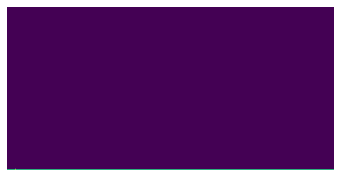

<Figure size 432x216 with 0 Axes>

i= 1000 	x=73 	y=10 	yStart=19


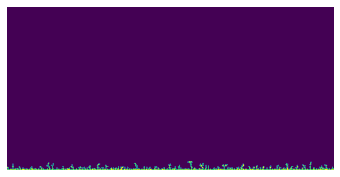

<Figure size 432x216 with 0 Axes>

i= 2000 	x=473 	y=15 	yStart=35


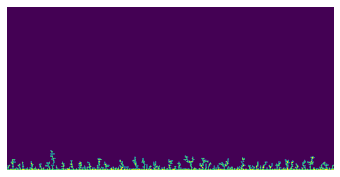

<Figure size 432x216 with 0 Axes>

i= 3000 	x=179 	y=25 	yStart=43


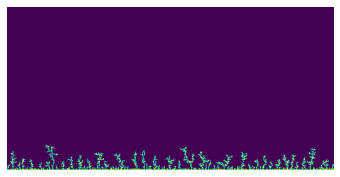

<Figure size 432x216 with 0 Axes>

i= 4000 	x=444 	y=16 	yStart=55


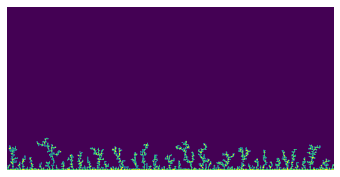

<Figure size 432x216 with 0 Axes>

i= 5000 	x=363 	y=39 	yStart=65


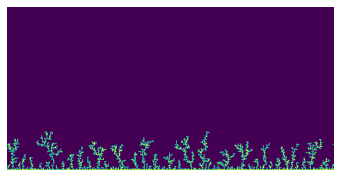

<Figure size 432x216 with 0 Axes>

i= 6000 	x=133 	y=48 	yStart=75


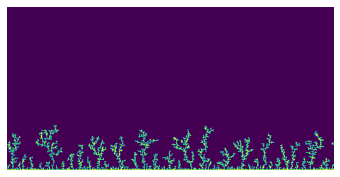

<Figure size 432x216 with 0 Axes>

i= 7000 	x=86 	y=75 	yStart=88


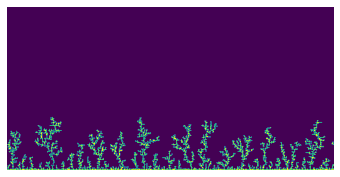

<Figure size 432x216 with 0 Axes>

i= 8000 	x=139 	y=71 	yStart=102


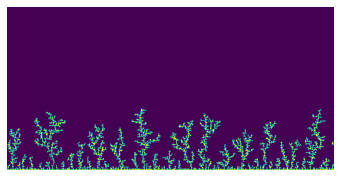

<Figure size 432x216 with 0 Axes>

i= 9000 	x=507 	y=102 	yStart=112


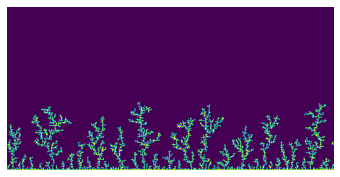

<Figure size 432x216 with 0 Axes>

i= 10000 	x=479 	y=103 	yStart=127


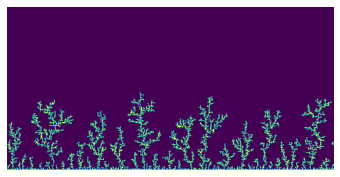

<Figure size 432x216 with 0 Axes>

i= 11000 	x=154 	y=94 	yStart=136


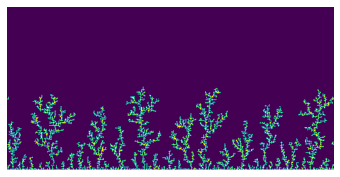

<Figure size 432x216 with 0 Axes>

i= 12000 	x=194 	y=122 	yStart=149


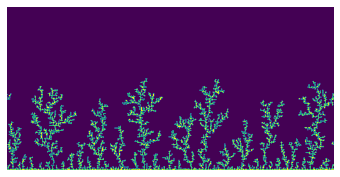

<Figure size 432x216 with 0 Axes>

i= 13000 	x=239 	y=58 	yStart=164


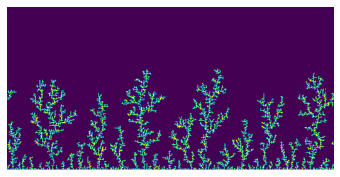

<Figure size 432x216 with 0 Axes>

i= 14000 	x=211 	y=163 	yStart=178


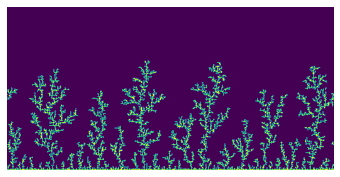

<Figure size 432x216 with 0 Axes>

i= 15000 	x=71 	y=176 	yStart=189


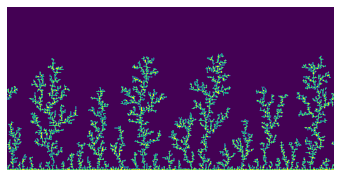

<Figure size 432x216 with 0 Axes>

i= 16000 	x=70 	y=182 	yStart=201


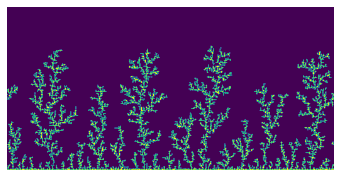

<Figure size 432x216 with 0 Axes>

i= 17000 	x=515 	y=193 	yStart=210


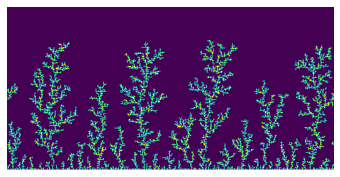

<Figure size 432x216 with 0 Axes>

i= 18000 	x=95 	y=213 	yStart=220


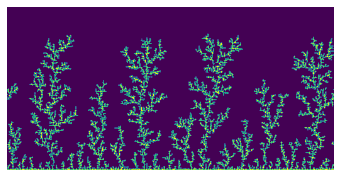

<Figure size 432x216 with 0 Axes>

i= 19000 	x=513 	y=218 	yStart=231


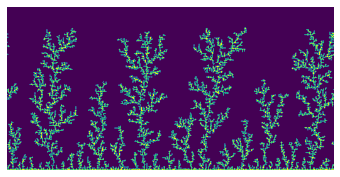

<Figure size 432x216 with 0 Axes>

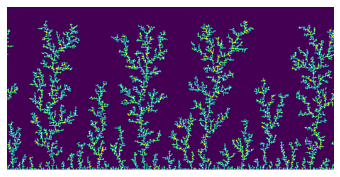

<Figure size 432x216 with 0 Axes>

q is 20.0 %


In [12]:
yBuffer = 5
yStart  = 1 + yBuffer
nParticles = 20000
maxX = 520
maxY = 260
A = np.zeros((maxX, maxY))
A[:,0] = 1
q=0.2

for i in range(0,nParticles):
    # Compute new starting point on the line y=yStart
    x  = np.random.randint(0,maxX)
    y  = yStart; #always start at upper limit

    while True:
        xOrg = x
        yOrg = y

        r = np.random.random(); # Random float:  0.0 <= r < 1.0
        #based on the value of 'r', move the particle
        #left, right, up, or down and change x and y accordingly
        if r<0.25:
            x = x+1 #right
        elif r>=0.25 and r<0.5:
            x = x-1 #left
        elif r>=0.5 and r<0.75:
            y = y+1 #up
        elif r>=0.75:
            y = y-1 #down
        
        #now apply periodic boundary conditions to 'x'
        if x<0:
            x = x + maxX
        if x>=maxX:
            x = x - maxX
        
        if (A[x,y] == 1 or y>yStart): 
            x = xOrg
            y = yOrg
            continue; # if this site has been taken try moving in a different direction
        
        #determine the x coordionates of the left and right neighbors
        #store them in 'xm' and 'xp' and apply periodic boundary conditions again
        xp = x + 1
        xm = x - 1
        yp = y + 1
        ym = y - 1
        
        if xp>=maxX:
            xp = xp - maxX
        if xm<0:
            xm = xm + maxX
        
        # Determine if any neighboring site is occupied
        # if that is the case, enter the following 'if' clause
        if A[xp,y]==1 or A[xm,y]==1 or A[x,ym]==1 or A[x,yp]==1:
            if np.random.random()<q:
                A[x,y]=0
                if A[xp,y]==1 and y!=1:
                    A[xp,y]=0
                if A[xm,y]==1 and y!=1:
                    A[xm,y]=0
                if A[x,ym]==1 and y!=1:
                    A[x,ym]=0
                if A[x,yp]==1 and y!=1:
                    A[x,ym]=0
            else:
                A[x,y] = 1
                if (y+yBuffer>yStart and y+yBuffer<maxY): 
                    yStart = y+yBuffer

                if (i%1000==0): 
                    print(f'i= {i} \tx={x} \ty={y} \tyStart={yStart}')

                nNewParticlesPerFrame = 1000 
                if (i%nNewParticlesPerFrame==0): 
                    display(A)

                break # particle was attached, break out of current loop and insert next one

    if (yStart+1==maxY): 
        print(f'Structures reached Y limit after only {i} particles')
        break

display(A)
print('q is',q*100,'%')

reran for different q values in cell  below

i= 0 	x=88 	y=1 	yStart=6


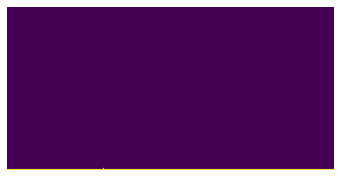

<Figure size 432x216 with 0 Axes>

i= 1000 	x=124 	y=1 	yStart=17


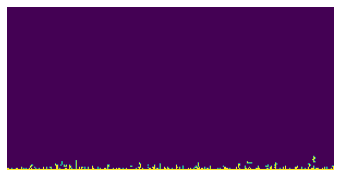

<Figure size 432x216 with 0 Axes>

i= 2000 	x=251 	y=7 	yStart=21


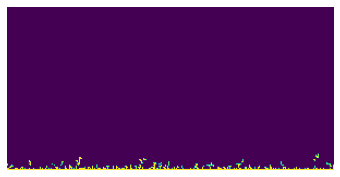

<Figure size 432x216 with 0 Axes>

i= 3000 	x=275 	y=4 	yStart=22


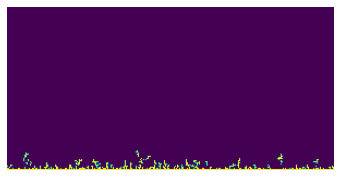

<Figure size 432x216 with 0 Axes>

i= 4000 	x=22 	y=15 	yStart=25


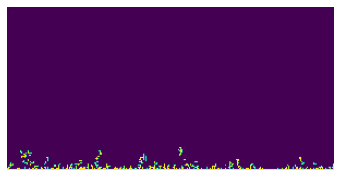

<Figure size 432x216 with 0 Axes>

i= 5000 	x=108 	y=4 	yStart=36


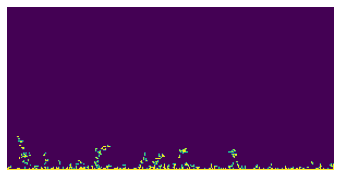

<Figure size 432x216 with 0 Axes>

i= 6000 	x=0 	y=29 	yStart=43


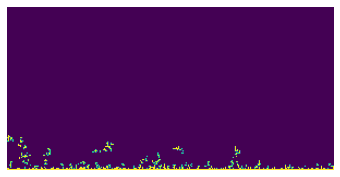

<Figure size 432x216 with 0 Axes>

i= 7000 	x=92 	y=29 	yStart=46


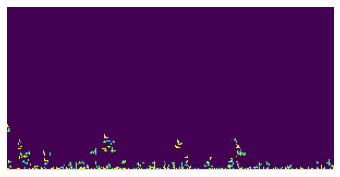

<Figure size 432x216 with 0 Axes>

i= 8000 	x=14 	y=35 	yStart=49


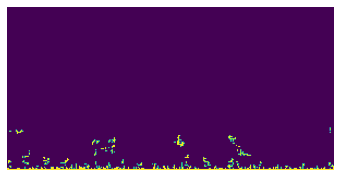

<Figure size 432x216 with 0 Axes>

i= 9000 	x=199 	y=30 	yStart=51


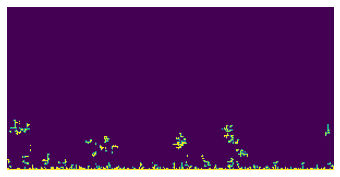

<Figure size 432x216 with 0 Axes>

i= 10000 	x=14 	y=35 	yStart=52


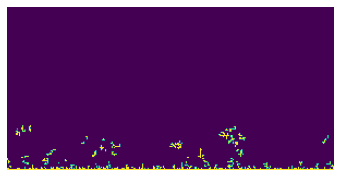

<Figure size 432x216 with 0 Axes>

i= 11000 	x=198 	y=35 	yStart=52


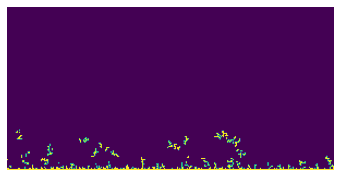

<Figure size 432x216 with 0 Axes>

i= 12000 	x=83 	y=21 	yStart=52


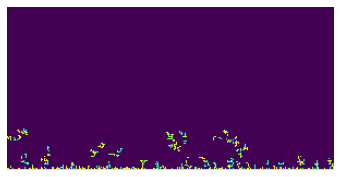

<Figure size 432x216 with 0 Axes>

i= 13000 	x=138 	y=31 	yStart=52


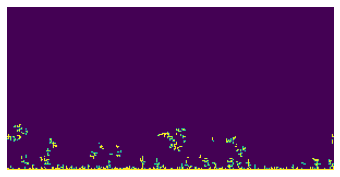

<Figure size 432x216 with 0 Axes>

i= 14000 	x=15 	y=46 	yStart=52


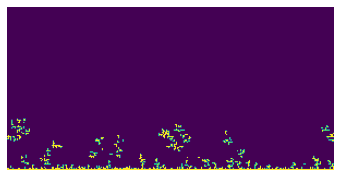

<Figure size 432x216 with 0 Axes>

i= 15000 	x=157 	y=52 	yStart=64


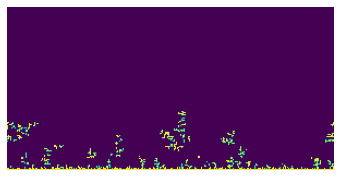

<Figure size 432x216 with 0 Axes>

i= 16000 	x=1 	y=42 	yStart=65


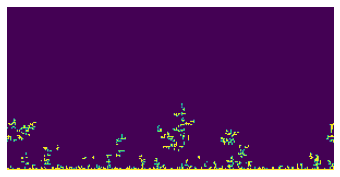

<Figure size 432x216 with 0 Axes>

i= 17000 	x=98 	y=30 	yStart=67


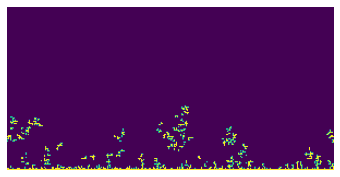

<Figure size 432x216 with 0 Axes>

i= 18000 	x=27 	y=49 	yStart=68


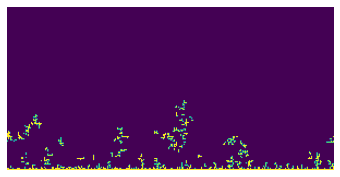

<Figure size 432x216 with 0 Axes>

i= 19000 	x=33 	y=37 	yStart=72


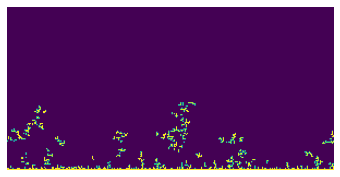

<Figure size 432x216 with 0 Axes>

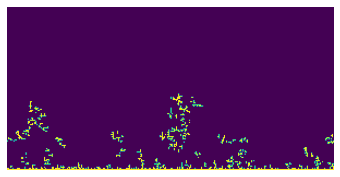

<Figure size 432x216 with 0 Axes>

q is 49.0 %


In [22]:
yBuffer = 5
yStart  = 1 + yBuffer
nParticles = 20000
maxX = 300
maxY = 150
A = np.zeros((maxX, maxY))
A[:,0] = 1
q=0.49

for i in range(0,nParticles):
    # Compute new starting point on the line y=yStart
    x  = np.random.randint(0,maxX)
    y  = yStart; #always start at upper limit

    while True:
        xOrg = x
        yOrg = y

        r = np.random.random(); # Random float:  0.0 <= r < 1.0
        #based on the value of 'r', move the particle
        #left, right, up, or down and change x and y accordingly
        if r<0.25:
            x = x+1 #right
        elif r>=0.25 and r<0.5:
            x = x-1 #left
        elif r>=0.5 and r<0.75:
            y = y+1 #up
        elif r>=0.75:
            y = y-1 #down
        
        #now apply periodic boundary conditions to 'x'
        if x<0:
            x = x + maxX
        if x>=maxX:
            x = x - maxX
        
        if (A[x,y] == 1 or y>yStart): 
            x = xOrg
            y = yOrg
            continue; # if this site has been taken try moving in a different direction
        
        #determine the x coordionates of the left and right neighbors
        #store them in 'xm' and 'xp' and apply periodic boundary conditions again
        xp = x + 1
        xm = x - 1
        yp = y + 1
        ym = y - 1
        
        if xp>=maxX:
            xp = xp - maxX
        if xm<0:
            xm = xm + maxX
        
        # Determine if any neighboring site is occupied
        # if that is the case, enter the following 'if' clause
        if A[xp,y]==1 or A[xm,y]==1 or A[x,ym]==1 or A[x,yp]==1:
            if np.random.random()<q:
                A[x,y]=0
                if A[xp,y]==1 and y!=1:
                    A[xp,y]=0
                if A[xm,y]==1 and y!=1:
                    A[xm,y]=0
                if A[x,ym]==1 and y!=1:
                    A[x,ym]=0
                if A[x,yp]==1 and y!=1:
                    A[x,ym]=0
            else:
                A[x,y] = 1
                if (y+yBuffer>yStart and y+yBuffer<maxY): 
                    yStart = y+yBuffer

                if (i%1000==0): 
                    print(f'i= {i} \tx={x} \ty={y} \tyStart={yStart}')

                nNewParticlesPerFrame = 1000 
                if (i%nNewParticlesPerFrame==0): 
                    display(A)

                break # particle was attached, break out of current loop and insert next one

    if (yStart+1==maxY): 
        print(f'Structures reached Y limit after only {i} particles')
        break

display(A)
print('q is',q*100,'%')

after about q=50%, it seems the cancelation is too strong for individual trees to even be able to form